In [1]:
# !pip3 install pyroomacoustics

In [13]:
import pyroomacoustics as pra
from scipy.io import wavfile
import soundfile as sf
import numpy as np
import malaya_speech
import IPython.display as ipd

In [97]:
%%time

y, sr = malaya_speech.load('speech/44k/test-2.wav', sr = 22050)

CPU times: user 20 ms, sys: 8.54 ms, total: 28.5 ms
Wall time: 29.6 ms


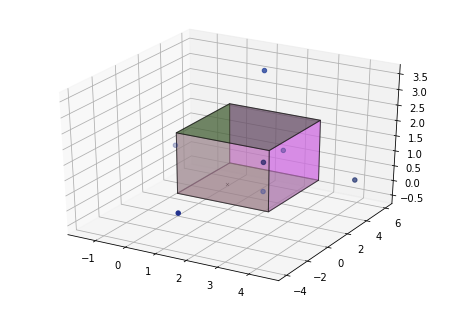

In [101]:
scale = 1.0

corners = np.array([[0,0], [0,5 * scale], [3 * scale,5 * scale], [3 * scale,0]]).T 
room = pra.Room.from_corners(corners, fs=sr,
                             materials=pra.Material(0.2, 0.15), 
                             ray_tracing=True, air_absorption=True)
room.extrude(2., materials=pra.Material(0.2, 0.15))
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)
room.add_source([1.5 *scale,4 *scale, 0.5], signal=y)
R = np.array([[1.5 *scale], [0.5 *scale], [0.5]])
room.add_microphone(R)
room.simulate()
fig, ax = room.plot(img_order=2)

In [102]:
ipd.Audio(room.mic_array.signals[0], rate = sr)

In [103]:
ipd.Audio(y, rate = sr)

In [105]:
r = malaya_speech.augmentation.waveform.highpass_filter(room.mic_array.signals[0], sr = sr, 
                                                        cutoff = int(scale * 500))
ipd.Audio(r, rate = sr)

In [62]:
from pydub import AudioSegment
import numpy as np
import os
from glob import glob

In [63]:
mp3s = glob('speech/distance/*.mp3')
mp3s

['speech/distance/far.mp3',
 'speech/distance/near.mp3',
 'speech/distance/middle.mp3',
 'speech/distance/very-far.mp3']

In [64]:
sr = 22050

r = {}
for f in mp3s:
    sound = AudioSegment.from_file(f)
    samples = sound.set_frame_rate(sr).set_channels(1).get_array_of_samples()
    samples = np.array(samples)
    samples = malaya_speech.utils.astype.int_to_float(samples)
    r[os.path.split(f)[1]] = samples

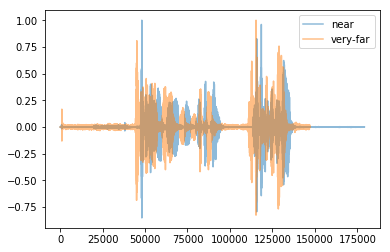

In [66]:
import matplotlib.pyplot as plt

plt.plot(r['near.mp3'], label = 'near', alpha = 0.5)
plt.plot(r['very-far.mp3'], label = 'very-far', alpha = 0.5)
plt.legend()
plt.show()

In [67]:
import IPython.display as ipd
ipd.Audio(r['near.mp3'], rate = sr)

In [68]:
ipd.Audio(r['very-far.mp3'], rate = sr)